<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Tensorflow_Computer_Vision_TPU_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import os
import datetime

In [0]:
import tensorflow_datasets as tfds
dataset,info = tfds.load(name="fashion_mnist",with_info=True,as_supervised=True,split=['train','test'],batch_size=-1)

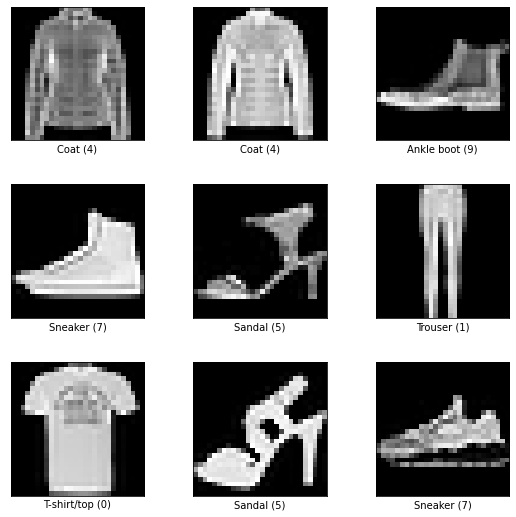

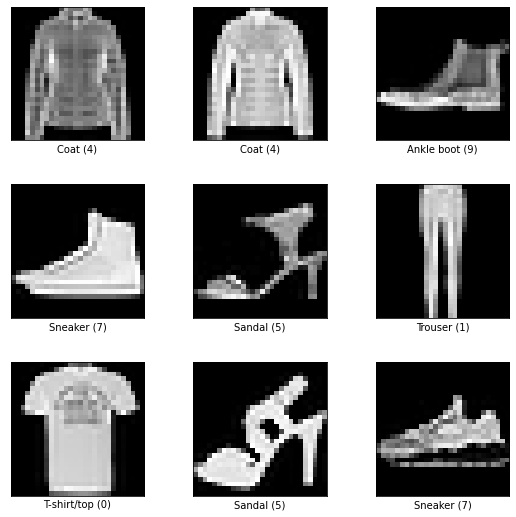

In [4]:
img_train,info_train=tfds.load(name="fashion_mnist",with_info=True,split='test')
tfds.show_examples(info_train,img_train)

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [0]:
train,test= tfds.as_numpy(dataset[0]),tfds.as_numpy(dataset[1])

In [0]:
x_train,y_train = train[0]/255,tf.one_hot(train[1],10)
x_test,y_test = test[0]/255,tf.one_hot(test[1],10)

In [0]:
x_test,x_val= x_test[5000:],x_test[:5000]
y_test,y_val = y_test[5000:],y_test[:5000]

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
print(x_test.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(5000, 10)


In [0]:
def create_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32,5,padding='same',activation='relu',input_shape=(28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(128,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(256,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))

  return model

In [11]:
resolver= tf.distribute.cluster_resolver.TPUClusterResolver(tpu="grpc://" + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
startegy = tf.distribute.experimental.TPUStrategy(resolver)

with startegy.scope():
  model = create_model()
  model.compile(
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-3,),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(
      x_train.astype(np.float32),np.float32(y_train),
      batch_size=256,
      epochs =25,
      steps_per_epoch=234,
      #validation_split=0.2
      validation_data=(x_val.astype(np.float32),np.float32(y_val)),
      validation_freq=1
  )


INFO:tensorflow:Initializing the TPU system: grpc://10.34.37.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.34.37.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/25
234/234 [==============================] - 6s 27ms/step - loss: 0.7537 - accuracy: 0.7154 - val_loss: 0.4184 - val_accuracy: 0.8430
Epoch 2/25
234/234 [==============================] - 4s 17ms/step - loss: 0.4073 - accuracy: 0.8502 - val_loss: 0.3524 - val_accuracy: 0.8700
Epoch 3/25
234/234 [==============================] - 4s 17ms/step - loss: 0.3415 - accuracy: 0.8774 - val_loss: 0.3128 - val_accuracy: 0.8830
Epoch 4/25
234/234 [==============================] - 4s 17ms/step - loss: 0.3029 - accuracy: 0.8896 - val_loss: 0.2839 - val_accuracy: 0.8972
Epoch 5/25
234/234 [==============================] - 4s 16ms/step - loss: 0.2816 - accuracy: 0.8959 - val_loss: 0.2613 - val_accuracy: 0.9028
Epoch 6/25
234/234 [==============================] - 4s 17ms/step - loss: 0.2602 - accuracy: 0.9042 - val_loss: 0.2471 - val_accuracy: 0.9098
Epoch 7/25
234/234 [==============================] - 4s 17ms/step - loss: 0.2464 - accuracy: 0.9096 - val_loss: 0.2393 - val_accuracy: 0.9110

In [0]:
model.save('/tmp/fashion_tpu.hdf5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The handle 'i' has a label of '_' which cannot be automatically added to the legend.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-

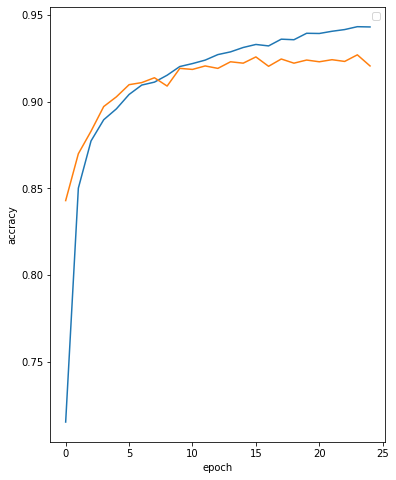

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accracy')
plt.xlabel('epoch')
plt.legend('train_acc','val_acc')
plt.show()


In [0]:
import tensorflow as tf
fminst_load=tf.keras.models.load_model('/tmp/fashion_tpu.hdf5',compile=True)

In [12]:
fminst_load.evaluate(x_test,y_test)

157/157 [==============================] - 7s 42ms/step - loss: 0.2325 - accuracy: 0.9266


[0.23254528641700745, 0.9265999794006348]

In [0]:
y_pred=fminst_load.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
labels= info.features['label'].names

In [19]:
y_pred

array([[1.8042721e-10, 1.0000000e+00, 3.5767285e-11, ..., 2.0488724e-14,
        2.9835504e-13, 5.7646059e-13],
       [6.6497290e-01, 3.6497458e-09, 9.4413321e-05, ..., 1.5509445e-10,
        3.8994273e-08, 1.0598043e-11],
       [3.4669518e-02, 7.6564541e-03, 1.8745524e-01, ..., 4.5979462e-04,
        9.2822544e-02, 6.5958372e-04],
       ...,
       [8.2228072e-03, 1.2576552e-02, 5.8985550e-02, ..., 1.1315050e-02,
        2.9432224e-02, 5.0453758e-03],
       [1.0607681e-05, 4.0952281e-07, 4.3288791e-03, ..., 4.6882910e-08,
        3.5529130e-05, 4.2588159e-08],
       [4.4674324e-17, 1.0000000e+00, 1.5190282e-17, ..., 2.5664909e-22,
        2.4593465e-21, 1.8353861e-21]], dtype=float32)

In [21]:
print(classification_report(y_test.numpy().argmax(axis=1),y_pred.argmax(axis=1),target_names=info.features["label"].names))

              precision    recall  f1-score   support

 T-shirt/top       0.93      0.82      0.87       489
     Trouser       0.99      0.99      0.99       513
    Pullover       0.89      0.89      0.89       478
       Dress       0.92      0.91      0.92       510
        Coat       0.87      0.91      0.89       518
      Sandal       0.99      0.99      0.99       494
       Shirt       0.77      0.82      0.80       519
     Sneaker       0.95      0.99      0.97       484
         Bag       0.97      0.99      0.98       496
  Ankle boot       0.99      0.96      0.97       499

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



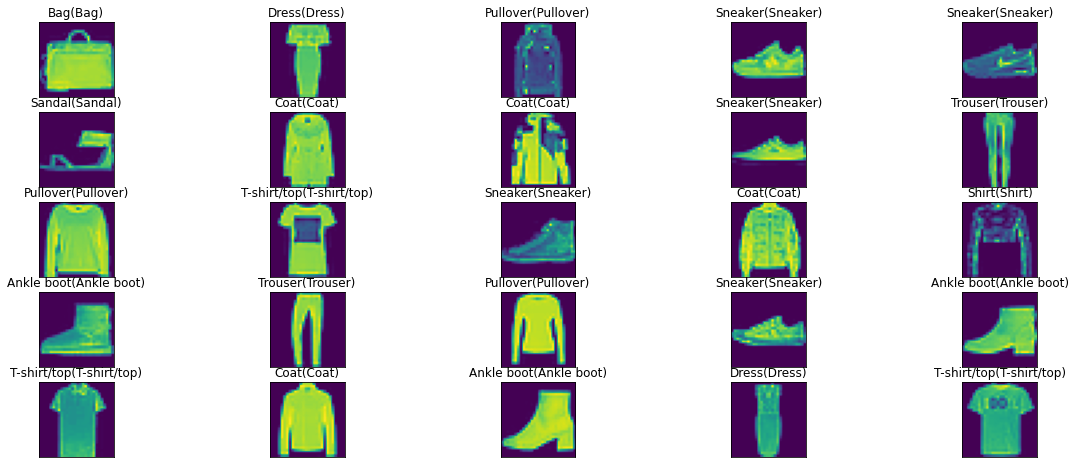

In [27]:
import matplotlib.pyplot as plt
import numpy as np
figure = plt.figure(figsize=(20,8))
for i,index in enumerate(np.random.choice(x_test.shape[0],size=25,replace=False)):
  ax=figure.add_subplot(5,5,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_test[index]))
  predict_index= np.argmax(y_pred[index])
  true_index= np.argmax(y_test.numpy()[index])
  ax.set_title("{}({})".format(labels[predict_index],
                               labels[true_index],
                               color=("green" if predict_index== true_index else "red")
  ))
